Twitter Werx: Construct a Python script that performs a sentiment analysis of Twitter activity for BBC, CBS, CNN, Fox, and New York times news outlets.

1 - Pull last 100 tweets from each outlet.

2 - perform a sentiment analysis

Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
3 - Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.

4 - Export the data in the DataFrame into a CSV file.

5 - Present findings visually and save PNG images for each plot.

 first plot:
    * a scatter plot of sentiments of the last **100** tweets sent out by each news organization
    * ranging from -1.0 to 1.0, 
    * where a score of 0 is a neutral sentiment, -1 the most negative sentiment, and +1 the most positive sentiment.
    * Each plot point will reflect the _compound_ sentiment of a tweet.
    * Sort each plot point by its relative timestamp.

 second plot:
    * a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. 
    * aggregate the compound sentiments analyzed by VADER.

## Dependancies and imports

In [1]:
# Dependancies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

## BBC BREAKING NEWS SENTIMENT ANALYSIS

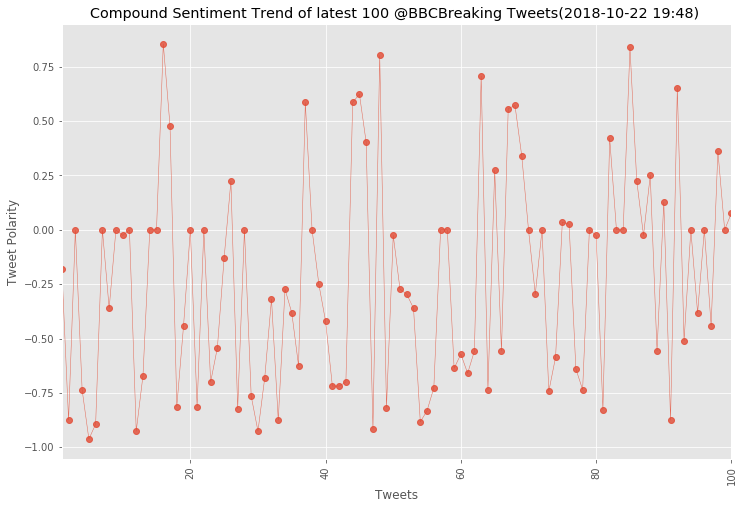

In [2]:
# State the target
target_user = "@BBCBreaking"

# Set up counter
counter = 1

# Variables for holding sentiments
sentiments_bbc = []

# variable for max_id
oldest_tweet = None

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets:
        #print Tweets
        #print(f'Tweet {counter}: {tweet["text"]}')
              
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        neg = results["neg"]
        neu = results["neu"]
        pos = results["pos"]
        
        # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        
        # Get Tweet ID, subtract 1 and assign to oldest tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments_bbc.append({"Outlet": target_user[0],
            "Date":tweet["created_at"],
            "Compound":compound, 
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Tweets Ago": counter})
        
       
        # increment counter
        counter += 1

        
# Store the Average Sentiments
sentiment_bbc_avg = {
        "Outlet": target_user,
        "BBC_Compound": np.mean(compound_list),
        "BBC_Positive": np.mean(positive_list),
        "BBC_Neutral": np.mean(neutral_list),
        "BBC_Negative": np.mean(negative_list)
    }

        # Convert sentiments to a DataFrame
sentiments_bbc_pd = pd.DataFrame.from_dict(sentiments_bbc)
#sentiments_bbc_pd.head()

#output csv
sentiments_bbc_pd.to_csv("Output/bbc_tweet_sentiments.csv", index=True, header=True)

dates=datetime#.strftime("%Y-%m-%d %H:%M")
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)

# Create plot
x_vals = sentiments_bbc_pd["Tweets Ago"]
y_vals = sentiments_bbc_pd["Compound"]
plt.plot(x_vals, y_vals, marker = "o", linewidth = 0.5, alpha = 0.8)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M") #Python time conversion
plt.title(f"Compound Sentiment Trend of latest 100 {target_user} Tweets({now}) ")
plt.xlim([x_vals.min(),x_vals.max()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets")

plt.savefig("Images/BBC_Sentiment_Summary.png")
plt.show()

In [3]:
sentiments_bbc_pd.tail()

,Compound,Date,Negative,Neutral,Outlet,Positive,Tweets Ago
95,0.0000,Thu Sep 20 16:10:35 +0000 2018,0.000,1.000,@,0.000,96
96,-0.4404,Thu Sep 20 14:13:40 +0000 2018,0.127,0.873,@,0.000,97
97,0.3612,Thu Sep 20 13:36:45 +0000 2018,0.000,0.878,@,0.122,98
98,0.0000,Thu Sep 20 12:59:39 +0000 2018,0.000,1.000,@,0.000,99
99,0.0772,Wed Sep 19 10:21:14 +0000 2018,0.000,0.909,@,0.091,100


         Outlet  BBC_Compound  BBC_Positive  BBC_Neutral  BBC_Negative
0  @BBCBreaking         -0.23          0.06         0.79          0.15


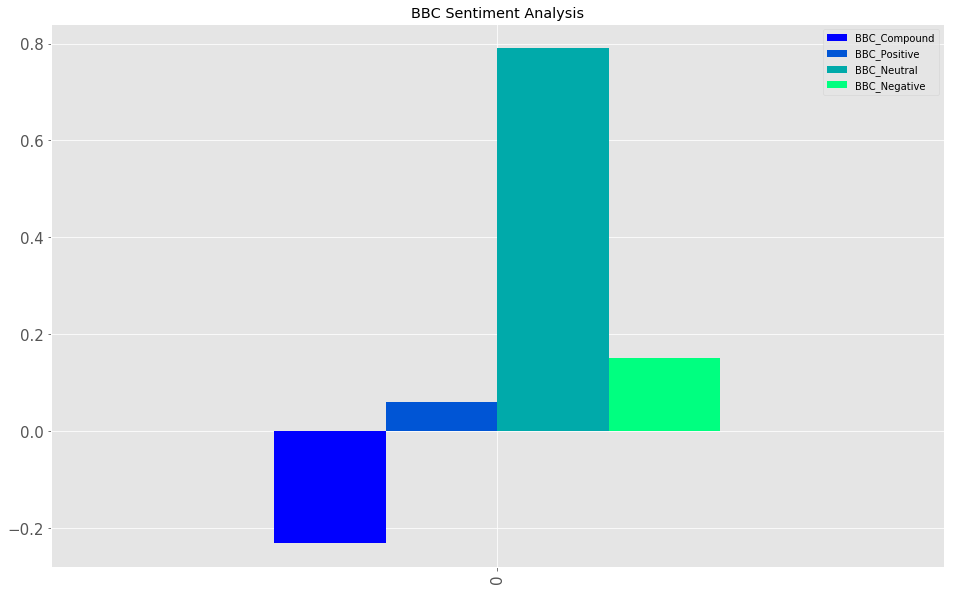

In [4]:
# Dataframe casting from sentiment averages
bbc_avg = pd.DataFrame(sentiment_bbc_avg, index=[0]).round(2)
print(bbc_avg)

# Create bar chart
bbc_avg.plot(kind='bar', title=(f'BBC Sentiment Analysis'), fontsize=15, figsize=[16,10], stacked=False, colormap='winter') 
plt.savefig("Images/BBC_Sentiment_chart.png")

## CBS BREAKING NEWS SENTIMENT ANALYSIS

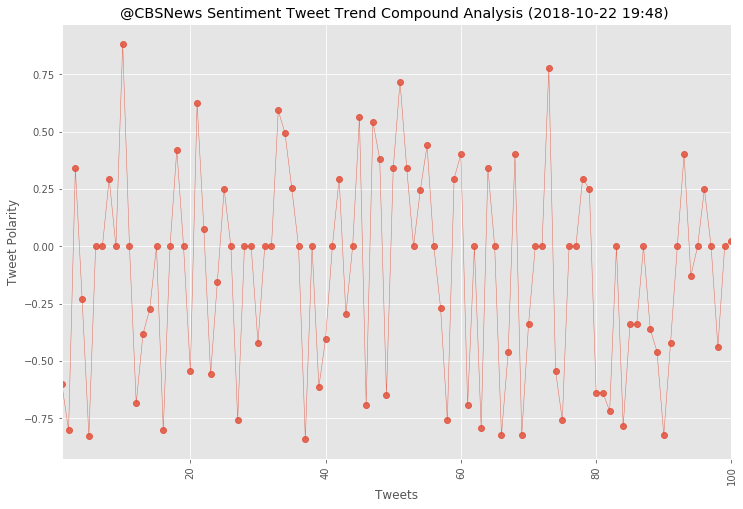

In [5]:
# State the target
target_user = "@CBSNews"

# Set up counter
counter = 1

# Variables for holding sentiments
sentiments_cbs = []

# variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets:
        #print Tweets
        #print(f'Tweet {counter}: {tweet["text"]}')
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        neg = results["neg"]
        neu = results["neu"]
        pos = results["pos"]
        
        # Get Tweet ID, subtract 1 and assign to oldest tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments_cbs.append({
            "Date":tweet["created_at"],
            "Compound":compound, 
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Tweets Ago": counter})
        
        # increment counter
        counter += 1
        
# Store the Average Sentiments
sentiment_cbs_avg = {
        "Outlet": target_user,
        "CBS_Compound": np.mean(compound_list),
        "CBS_Positive": np.mean(positive_list),
        "CBS_Neutral": np.mean(neutral_list),
        "CBS_Negative": np.mean(negative_list)
    }        
        
        # Convert sentiments to a DataFrame
sentiments_cbs_pd = pd.DataFrame.from_dict(sentiments_cbs)
#sentiments_bbc_pd.head()

sentiments_cbs_pd.to_csv("Output/cbs_tweet_sentiments.csv", index=True, header=True)

dates=datetime
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)

# Create plot
x_vals = sentiments_cbs_pd["Tweets Ago"]
y_vals = sentiments_cbs_pd["Compound"]
plt.plot(x_vals,
        y_vals, marker = "o", linewidth = 0.5, alpha = 0.8)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M") #Python time conversion
plt.title(f"{target_user} Sentiment Tweet Trend Compound Analysis ({now}) ")
plt.xlim([x_vals.min(),x_vals.max()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets")
plt.savefig("Images/CBS_Sentiment_Summary.png")
plt.show()

In [6]:
sentiments_cbs_pd.tail()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
95,0.2500,Mon Oct 22 04:18:04 +0000 2018,0.000,0.846,0.154,96
96,0.0000,Mon Oct 22 04:03:04 +0000 2018,0.000,1.000,0.000,97
97,-0.4404,Mon Oct 22 03:48:03 +0000 2018,0.162,0.838,0.000,98
98,0.0000,Mon Oct 22 03:33:02 +0000 2018,0.000,1.000,0.000,99
99,0.0258,Mon Oct 22 03:18:03 +0000 2018,0.128,0.739,0.133,100


     Outlet  CBS_Compound  CBS_Positive  CBS_Neutral  CBS_Negative
0  @CBSNews         -0.23          0.06         0.79          0.15


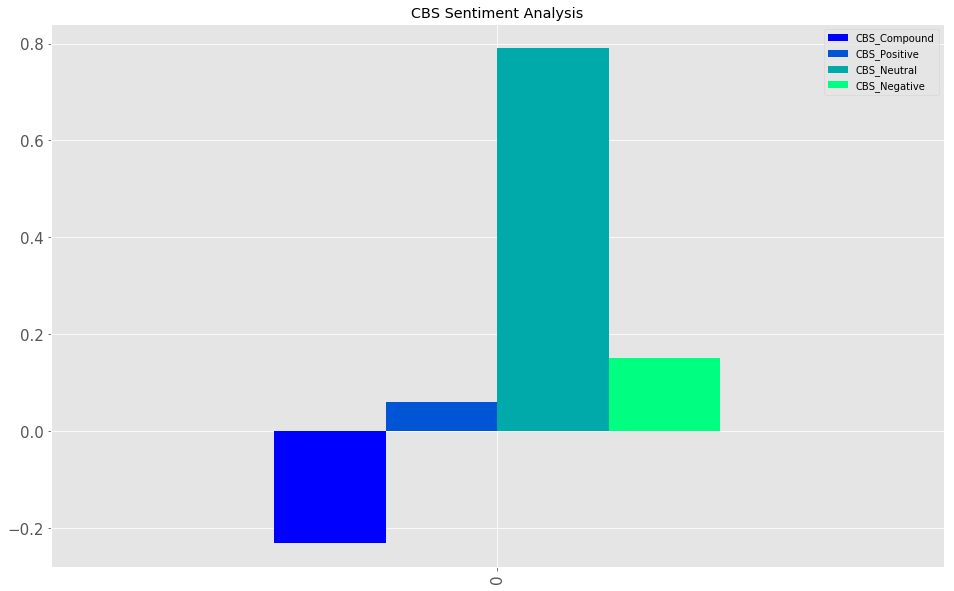

In [7]:
# Dataframe casting from sentiment averages
cbs_avg = pd.DataFrame(sentiment_cbs_avg, index=[0]).round(2)
print(cbs_avg)

# Create bar chart
cbs_avg.plot(kind='bar', title=(f'CBS Sentiment Analysis'), fontsize=15, figsize=[16,10], stacked=False, colormap='winter') # area plot
plt.savefig("Images/CBS_Sentiment_chart.png")

## CNN BREAKING NEWS SENTIMENT ANALYSIS

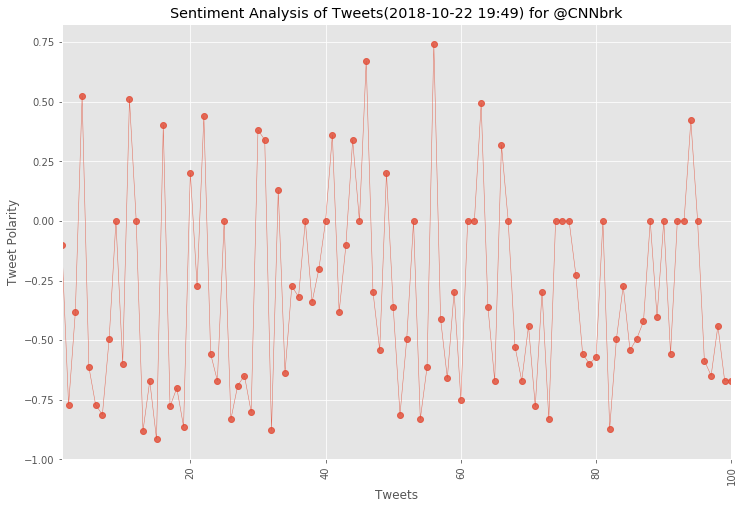

In [8]:

# State the target
target_user = "@CNNbrk"

# Set up counter
counter = 1

# Variables for holding sentiments
sentiments_cnn = []

# variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets:
        #print Tweets
        #print(f'Tweet {counter}: {tweet["text"]}')
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        neg = results["neg"]
        neu = results["neu"]
        pos = results["pos"]
        
        # Get Tweet ID, subtract 1 and assign to oldest tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments_cnn.append({
            "Date":tweet["created_at"],
            "Compound":compound, 
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Tweets Ago": counter})
        
        # increment counter
        counter += 1

        # Store the Average Sentiments
sentiment_cnn_avg = {
        "Outlet": target_user,
        "CNN_Compound": np.mean(compound_list),
        "CNN_Positive": np.mean(positive_list),
        "CNN_Neutral": np.mean(neutral_list),
        "CNN_Negative": np.mean(negative_list)
    }           
        # Convert sentiments to a DataFrame
sentiments_cnn_pd = pd.DataFrame.from_dict(sentiments_cnn)
#sentiments_bbc_pd.head()

sentiments_cnn_pd.to_csv("Output/cnn_tweet_sentiments.csv", index=True, header=True)

dates=datetime
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)

# Create plot
x_vals = sentiments_cnn_pd["Tweets Ago"]
y_vals = sentiments_cnn_pd["Compound"]
plt.plot(x_vals,
        y_vals, marker = "o", linewidth = 0.5, alpha = 0.8)


# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M") #Python time conversion
plt.title(f"Sentiment Analysis of Tweets({now}) for {target_user}")
plt.xlim([x_vals.min(),x_vals.max()])
plt.ylabel("Tweet Polarity")
plt.savefig("Images/CNN_Sentiment_Summary.png")
plt.xlabel("Tweets")
plt.show()

In [9]:
sentiments_cnn_pd.tail()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
95,-0.5859,Sun Oct 14 22:58:42 +0000 2018,0.194,0.806,0.000,96
96,-0.6486,Sun Oct 14 21:03:26 +0000 2018,0.253,0.650,0.097,97
97,-0.4404,Sun Oct 14 18:55:26 +0000 2018,0.157,0.843,0.000,98
98,-0.6705,Sun Oct 14 17:28:07 +0000 2018,0.231,0.769,0.000,99
99,-0.6705,Sun Oct 14 16:59:30 +0000 2018,0.200,0.800,0.000,100


    Outlet  CNN_Compound  CNN_Positive  CNN_Neutral  CNN_Negative
0  @CNNbrk         -0.23          0.06         0.79          0.15


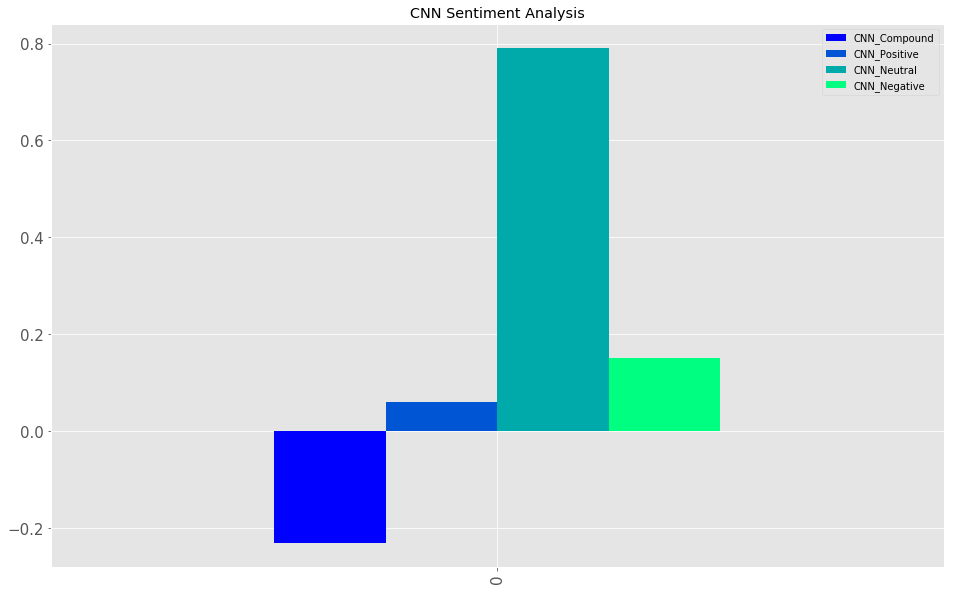

In [10]:
# Dataframe casting from sentiment averages
cnn_avg = pd.DataFrame(sentiment_cnn_avg, index=[0]).round(2)
print(cnn_avg)

# Create bar chart
cnn_avg.plot(kind='bar', title=(f'CNN Sentiment Analysis'), fontsize=15, figsize=[16,10], stacked=False, colormap='winter') # area plot
plt.savefig("Images/CNN_Sentiment_chart.png")

## FOX BREAKING NEWS SENTIMENT ANALYSIS

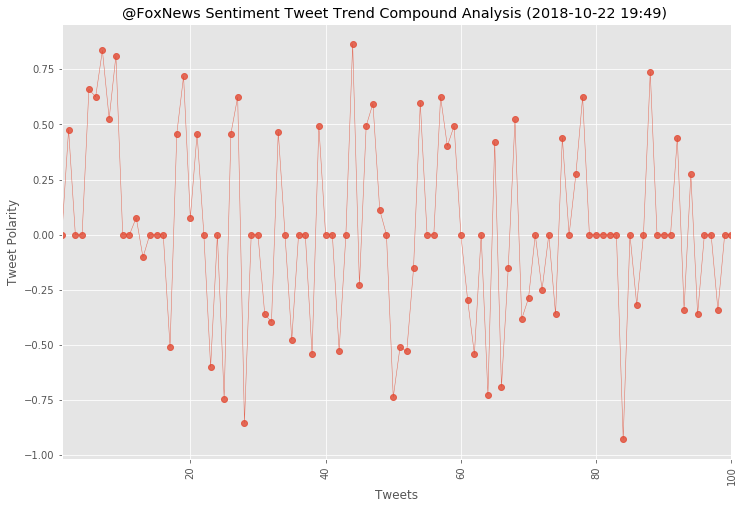

In [11]:
# State the target
target_user ="@FoxNews"

# Set up counter
counter = 1

# Variables for holding sentiments
sentiments_fox = []

# variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets:
        #print Tweets
        #print(f'Tweet {counter}: {tweet["text"]}')
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        neg = results["neg"]
        neu = results["neu"]
        pos = results["pos"]
        
        # Get Tweet ID, subtract 1 and assign to oldest tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments_fox.append({
            "Date":tweet["created_at"],
            "Compound":compound, 
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Tweets Ago": counter})
        
        # increment counter
        counter += 1

# Store the Average Sentiments
sentiment_fox_avg = {
        "Outlet": target_user,
        "FOX_Compound": np.mean(compound_list),
        "FOX_Positive": np.mean(positive_list),
        "FOX_Neutral": np.mean(neutral_list),
        "FOX_Negative": np.mean(negative_list)
    }          
        
        # Convert sentiments to a DataFrame
sentiments_fox_pd = pd.DataFrame.from_dict(sentiments_fox)
#sentiments_bbc_pd.head()
#sentiments_fox_pd.sort_values('Tweets Ago', inplace=True, ascending=True)


sentiments_fox_pd.to_csv("Output/fox_tweet_sentiments.csv", index=True, header=True)

dates=datetime
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)

# Create plot
x_vals = sentiments_fox_pd["Tweets Ago"].sort_values()
y_vals = sentiments_fox_pd["Compound"]
plt.plot(x_vals,
        y_vals, marker = "o", linewidth = 0.5, alpha = 0.8)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M") #Python time conversion
plt.title(f"{target_user} Sentiment Tweet Trend Compound Analysis ({now}) ")
plt.xlim([x_vals.min(),x_vals.max()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets")
plt.savefig("Images/FOX_Sentiment_Summary.png")
plt.show()

In [12]:
sentiments_fox_pd.tail()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
95,0.00,Mon Oct 22 16:04:46 +0000 2018,0.000,1.000,0.0,96
96,0.00,Mon Oct 22 16:00:20 +0000 2018,0.000,1.000,0.0,97
97,-0.34,Mon Oct 22 16:00:00 +0000 2018,0.231,0.769,0.0,98
98,0.00,Mon Oct 22 15:55:00 +0000 2018,0.000,1.000,0.0,99
99,0.00,Mon Oct 22 15:45:00 +0000 2018,0.000,1.000,0.0,100


     Outlet  FOX_Compound  FOX_Positive  FOX_Neutral  FOX_Negative
0  @FoxNews         -0.23          0.06         0.79          0.15


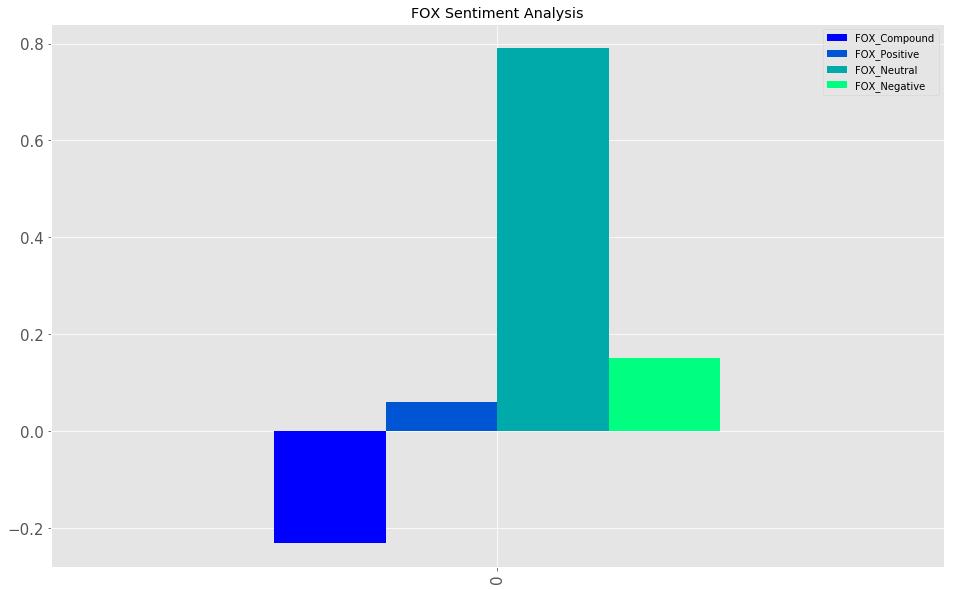

In [13]:
# Dataframe casting from sentiment averages
fox_avg = pd.DataFrame(sentiment_fox_avg, index=[0]).round(2)
print(fox_avg)

# Create bar chart
fox_avg.plot(kind='bar', title=(f'FOX Sentiment Analysis'), fontsize=15, figsize=[16,10], stacked=False, colormap='winter') # area plot
plt.savefig("Images/FOX_Sentiment_chart.png")

## NYT BREAKING NEWS SENTIMENT ANALYSIS

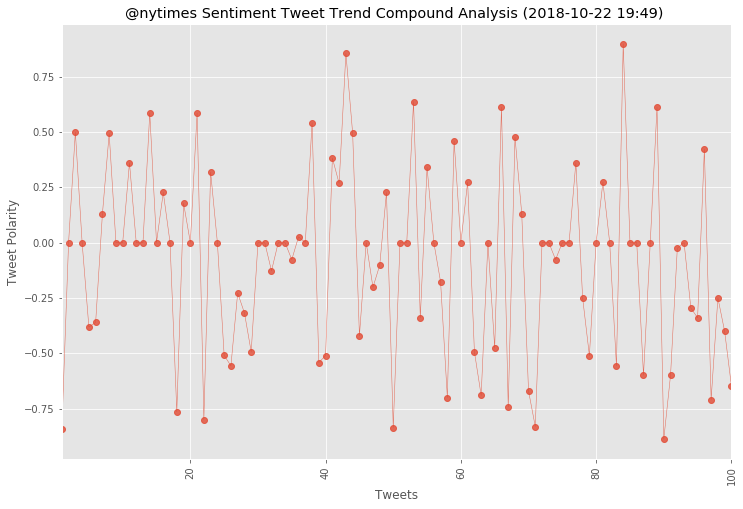

In [14]:

# State the target
target_user ="@nytimes"

# Set up counter
counter = 1

# Variables for holding sentiments
sentiments_nyt = []

# variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):
    
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)
    
    # Loop through all tweets
    for tweet in public_tweets:
        #print Tweets
        #print(f'Tweet {counter}: {tweet["text"]}')
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        neg = results["neg"]
        neu = results["neu"]
        pos = results["pos"]
        
        # Get Tweet ID, subtract 1 and assign to oldest tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        sentiments_nyt.append({
            "Date":tweet["created_at"],
            "Compound":compound, 
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "Tweets Ago": counter})
        
        # increment counter
        counter += 1

# Store the Average Sentiments
sentiment_nyt_avg = {
        "Outlet": target_user,
        "NYT_Compound": np.mean(compound_list),
        "NYT_Positive": np.mean(positive_list),
        "NYT_Neutral": np.mean(neutral_list),
        "NYT_Negative": np.mean(negative_list)
    }   
        
        # Convert sentiments to a DataFrame
sentiments_nyt_pd = pd.DataFrame.from_dict(sentiments_nyt)
#sentiments_bbc_pd.head()

sentiments_nyt_pd.to_csv("Output/nyt_tweet_sentiments.csv", index=True, header=True)

dates=datetime
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)

# Create plot
x_vals = sentiments_nyt_pd["Tweets Ago"]
y_vals = sentiments_nyt_pd["Compound"]
plt.plot(x_vals,
        y_vals, marker = "o", linewidth = 0.5, alpha = 0.8)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M") #Python time conversion
plt.title(f"{target_user} Sentiment Tweet Trend Compound Analysis ({now}) ")
plt.xlim([x_vals.min(),x_vals.max()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets")
plt.savefig("Images/NYTIMES_Sentiment_Summary.png")
plt.show()

In [15]:
sentiments_nyt_pd.tail()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
95,0.4215,Mon Oct 22 07:30:07 +0000 2018,0.000,0.865,0.135,96
96,-0.7096,Mon Oct 22 07:15:04 +0000 2018,0.301,0.699,0.000,97
97,-0.2500,Mon Oct 22 07:00:12 +0000 2018,0.100,0.900,0.000,98
98,-0.4019,Mon Oct 22 06:45:06 +0000 2018,0.130,0.870,0.000,99
99,-0.6486,Mon Oct 22 06:30:12 +0000 2018,0.177,0.823,0.000,100


     Outlet  NYT_Compound  NYT_Positive  NYT_Neutral  NYT_Negative
0  @nytimes         -0.23          0.06         0.79          0.15


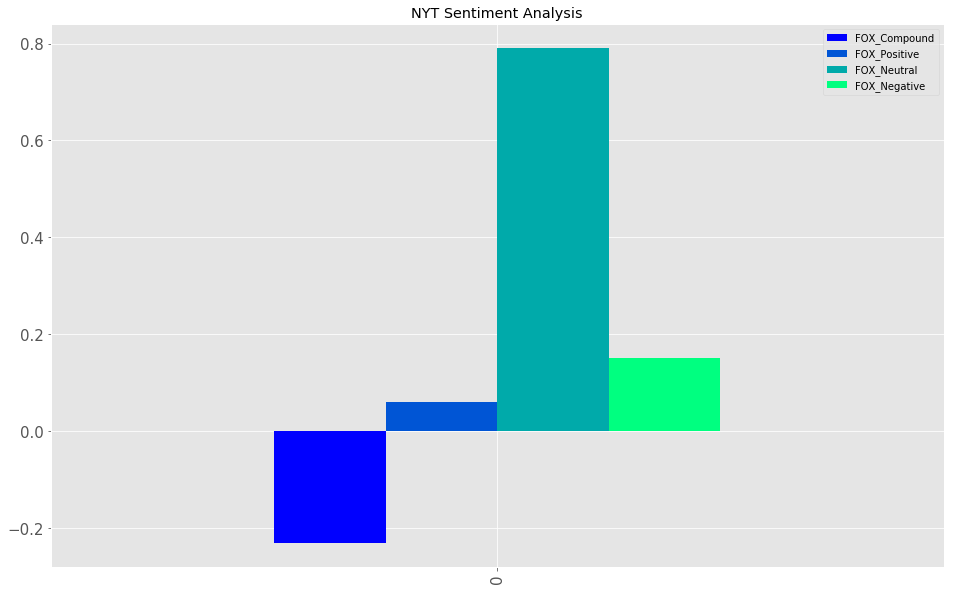

In [16]:
# Dataframe casting from sentiment averages
nyt_avg = pd.DataFrame(sentiment_nyt_avg, index=[0]).round(2)
print(nyt_avg)

# Create bar chart
fox_avg.plot(kind='bar', title=(f'NYT Sentiment Analysis'), fontsize=15, figsize=[16,10], stacked=False, colormap='winter') # area plot
plt.savefig("Images/NYT_Sentiment_chart.png")

## BBC, CBS, CNN, FOX, NYT GROUPED AVERAGE BREAKING NEWS SENTIMENT ANALYSIS

{'Organization': '@BBCBreaking', 'Compound': -0.11314302325581395, 'Positive': 0.04575581395348838, 'Neutral': 0.07806976744186046, 'Negative': 0.8761744186046512, 'Tweet Count': 86}

{'Organization': '@CBSNews', 'Compound': -0.030298709677419353, 'Positive': 0.09283225806451613, 'Neutral': 0.10269677419354838, 'Negative': 0.8044774193548387, 'Tweet Count': 155}

{'Organization': '@CNNbrk', 'Compound': -0.034788321167883225, 'Positive': 0.07613138686131386, 'Neutral': 0.08391240875912408, 'Negative': 0.8399708029197079, 'Tweet Count': 137}

{'Organization': '@FoxNews', 'Compound': 0.021047863247863254, 'Positive': 0.07417094017094018, 'Neutral': 0.05717094017094017, 'Negative': 0.8686495726495727, 'Tweet Count': 117}

{'Organization': '@nytimes', 'Compound': -0.0452568, 'Positive': 0.054880000000000005, 'Neutral': 0.08388, 'Negative': 0.861256, 'Tweet Count': 125}

{'Organization': '@nytimes', 'Compound': -0.0452568, 'Positive': 0.054880000000000005, 'Neutral': 0.08388, 'Negative': 0.8

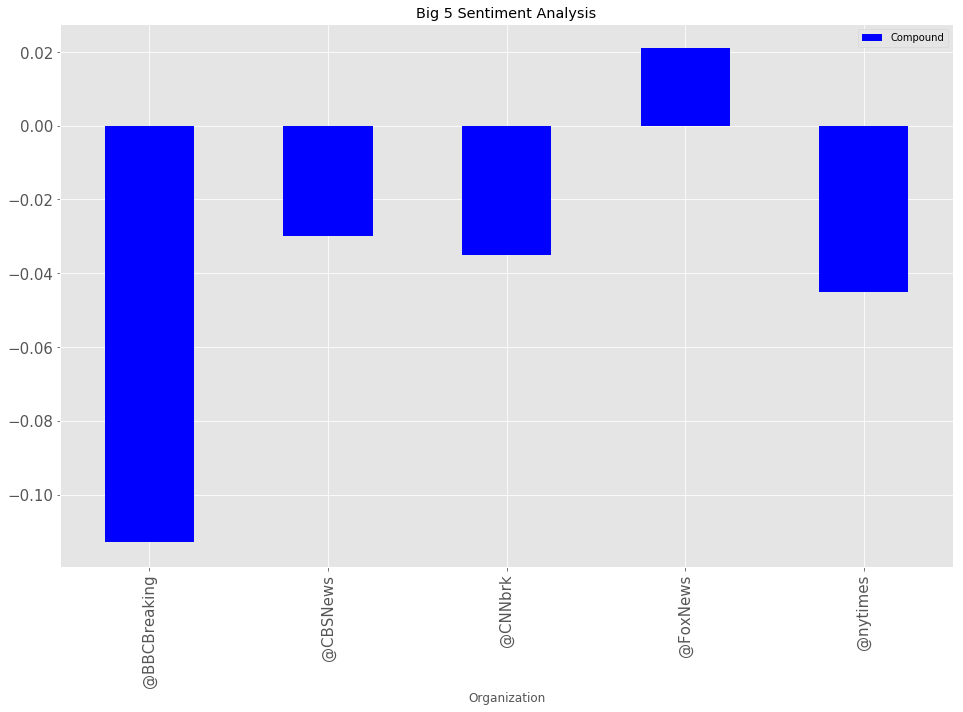

In [17]:
# Target Search Term
target_terms = ("@BBCBreaking","@CBSNews","@CNNbrk","@FoxNews","@nytimes")

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# List to hold results
results_list = []
results_list2=[]

# Loop through all target users
for target in target_terms:

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 times
    for x in range(3):

        # Run search around each tweet
        public_tweets = api.search(
            target, count=100, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers
                and tweet["user"]["statuses_count"] > min_tweets
                and tweet["user"]["statuses_count"] < max_tweets
                and tweet["user"]["friends_count"] < max_following
                and tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

                # Add each value to the appropriate list
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                
            # Set the new oldest_tweet value
            oldest_tweet = tweet["id"] - 1

    # Store the Average Sentiments
    sentiment = {
        "Organization": target,
        "Compound": np.mean(compound_list),
        "Positive": np.mean(positive_list),
        "Neutral": np.mean(negative_list),
        "Negative": np.mean(neutral_list),
        "Tweet Count": len(compound_list)
    }

    sentiment2 = {
        "Organization": target,
        "Compound": np.mean(compound_list)
        
        #"Positive": np.mean(positive_list),
        #"Neutral": np.mean(negative_list),
        #"Negative": np.mean(neutral_list)
    }
    # Print the Sentiments
    print(sentiment)
    print()
    
    # Append airline results to 'results_list'
    results_list.append(sentiment)
    results_list2.append(sentiment2)
    
print(sentiment)   

Big_5_tweet_sentiments_df = pd.DataFrame.from_dict(results_list).set_index("Organization").round(3)
Big_5_tweet_sentiments_df.head()

            # Convert sentiments to a DataFrame
# Dataframe casting from sentiment averages
Big_5_tweet_compound_sentiments_df = pd.DataFrame.from_dict(results_list2).set_index("Organization").round(3)

Big_5_tweet_compound_sentiments_df.head()

Big_5_tweet_sentiments_df.to_csv("Output/Big_5_tweet_sentiments.csv", index=True, header=True)
print(Big_5_tweet_sentiments_df)

Big_5_tweet_compound_sentiments_df.to_csv("Output/Big_5_tweet_coupound_sentiments.csv", index=True, header=True)
print(Big_5_tweet_compound_sentiments_df)

# Big_5_tweet_sentiments_df

Big_5_tweet_compound_sentiments_df.plot(kind='bar', title=(f'Big 5 Sentiment Analysis'), fontsize=15, figsize=[16,10], stacked=True, colormap='winter') # area plot
plt.savefig("Images/Big-5_compound_Sentiment_chart.png")